In [1]:
from datetime import datetime, timedelta
import requests
import pandas as pd
import time
import logging
import matplotlib.pyplot as plt
log = logging.getLogger(__name__)

In [2]:
bearer_token_path = 'C:\\Users\\AlexGolden\\Dropbox (BOSTON UNIVERSITY)\\twitter_stocks_project\\bearer_token.txt'

In [3]:
with open(bearer_token_path) as fp:
    bearer_token = fp.read()
    
dtformat = '%Y-%m-%dT%H:%M:%SZ'
    
def get_data(tweet):
    data = {
        'id': tweet['id'],
        'created_at': tweet['created_at'],
        'text': tweet['text']
    }
    return data

def gather_tweets(search_term,start_time,end_time):
    endpoint = 'https://api.twitter.com/2/tweets/search/all'
    headers = {'authorization': f'Bearer {bearer_token}'}
    params = {
    'max_results': '500',
    'tweet.fields':'created_at,lang'
    }
    params['query'] = search_term
    params['end_time'] = end_time
    params['start_time'] = start_time
    
    response = requests.get(endpoint,
                       params=params,
                       headers=headers)
   
    return response
        
def append_tweets(search_term, ending, num_queries, data_frame):
    
    remaining_calls = None
    reset_time = None
    
    for i in range(num_queries):
        end_temp = ending - timedelta(minutes = i*60)
        end_time = end_temp.strftime(dtformat)
        start_time = (end_temp - timedelta(minutes = 60)).strftime(dtformat)
        #print('start time = ', start_time)
        #print('end time = ', end_time)
        
        if (reset_time is not None and remaining_calls is not None 
            and remaining_calls < 1):
            
            sleep_time = int(reset_time) - int(time.time())
            if sleep_time > 0:
                log.warning(f"Rate limit reached. Sleeping for: {sleep_time}")
                time.sleep(sleep_time + 5)  # Sleep for an extra second
        
        response = gather_tweets(search_term,start_time,end_time)
        # print('resp test 1')
        # print(response.json().keys())
        try: 
            if 'meta' in response.json().keys():
                if response.json()['meta']['result_count'] == 0:
                    # print('no results, continuing')
                    time.sleep(1)
                    continue
        except:
            print('it broke??')
            response = gather_tweets(search_term,start_time,end_time)
            return data_frame
            print(response.json())
            assert False
            
        else:
            # print(response.json())
            pass
        if 'data' not in response.json().keys():
            # print('data field not found:')
            # print(response.json())
            pass
        
        rem_calls = response.headers.get('x-rate-limit-remaining')
        if rem_calls is not None:
            remaining_calls = int(rem_calls)
        elif remaining_calls is not None:
            remaining_calls -= 1
            
        reset_time = response.headers.get('x-rate-limit-reset')
        if reset_time is not None:
            reset_time = int(reset_time)
        # print('resp test 2')
        # print(response.json().keys())
        sleep_inc = 2
        skip_flag = False
        while 'data' not in response.json().keys() and skip_flag == False:
            time.sleep(sleep_inc)
            log.warning(f'Rate limit detection error. Sleeping for: {sleep_inc} seconds')
            response = gather_tweets(search_term,start_time,end_time)
            try:
            
                if 'meta' in response.json().keys():
                    if response.json()['meta']['result_count'] == 0:
                        # skip this one
                        skip_flag = True
                        time.sleep(1)
                        break
            except:
                print('it broke??')
                return data_frame
                print(response.json())
                assert False
            
            if sleep_inc > 3600:
                log.warning('Rate limit recovery duration over 1 hr. Aborting.')
                return data_frame
            sleep_inc = sleep_inc*2
        if skip_flag:
            continue
        for tweet in response.json()['data']:
            if tweet['text'][:2] != 'RT':
                row = get_data(tweet)
                data_frame = data_frame.append(row,ignore_index = True)
        
        if i<num_queries-1: time.sleep(1) #wait 1 second for each iteration to avoid overloading
        
    return data_frame
        

In [24]:
end = datetime.now() - timedelta(days = 1)
df_mmm = pd.DataFrame()
df_mmm = append_tweets('($mmm) (lang:en)', end, 24 ,df_mmm)

In [5]:
df_mmm = pd.DataFrame()
end = datetime.now() - timedelta(days = 1)
for i in range(400):
    df_mmm = append_tweets('($mmm) (lang:en)', end, 24 ,df_mmm)
    end = end - timedelta(days = 1)

Rate limit detection error. Sleeping for: 2 seconds
Rate limit detection error. Sleeping for: 2 seconds
Rate limit detection error. Sleeping for: 2 seconds
Rate limit detection error. Sleeping for: 2 seconds
Rate limit detection error. Sleeping for: 2 seconds
Rate limit detection error. Sleeping for: 2 seconds
Rate limit detection error. Sleeping for: 2 seconds
Rate limit detection error. Sleeping for: 2 seconds
Rate limit reached. Sleeping for: 521
Rate limit detection error. Sleeping for: 2 seconds
Rate limit detection error. Sleeping for: 2 seconds
Rate limit detection error. Sleeping for: 2 seconds
Rate limit detection error. Sleeping for: 2 seconds
Rate limit detection error. Sleeping for: 2 seconds
Rate limit detection error. Sleeping for: 2 seconds
Rate limit detection error. Sleeping for: 2 seconds
Rate limit reached. Sleeping for: 511
Rate limit detection error. Sleeping for: 2 seconds
Rate limit detection error. Sleeping for: 2 seconds
Rate limit detection error. Sleeping for

it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??
it broke??

In [16]:
response = gather_tweets('($mmm) (lang:en)',(datetime.now() - timedelta(days = 2)).strftime(dtformat),(datetime.now() - timedelta(days = 1)).strftime(dtformat))

In [6]:
df_mmm.shape

(5231, 3)

In [17]:
response.headers.get('x-rate-limit-reset')

'1630807735'

In [8]:
df_mmm.shape

AttributeError: 'Response' object has no attribute 'shape'

In [11]:
df_mmm.to_csv('twitter_df_mmm.csv')

In [12]:

df_mmm = pd.read_csv('twitter_df_mmm.csv', parse_dates=['created_at'])

In [ ]:
df_tsla.groupby(pd.Grouper(key="created_at", freq='W')).count().plot(kind="bar")

In [ ]:
print(df_tsla.shape)
df_tsla.head()

<ipython-input-13-adc2572c9eb1>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_mmm.groupby(df_mmm["created_at"].dt.week).count().plot(kind="bar")


<AxesSubplot:xlabel='created_at'>

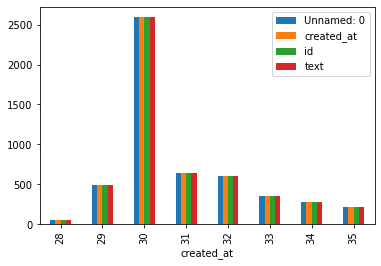

In [13]:
df_mmm.groupby(df_mmm["created_at"].dt.week).count().plot(kind="bar")

In [10]:
type(df_mmm["created_at"].dt)

AttributeError: Can only use .dt accessor with datetimelike values